In [14]:
import tensorflow as tf
import numpy as np
import sys
import imp
import note_seq

In [2]:
import rl_tuner
import rl_tuner_ops

c:\users\daphné\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
c:\users\daphné\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
c:\users\daphné\appdata\local\programs\python\python37\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to

In [3]:
# Place to save your model checkpoints and composi|
SAVE_PATH = "C:/Daphne/Ecole/MILA/1E2021/BMI/RL-Tuner/RL-Tuner/RL-Tuner/Results"

In [4]:
# Model parameter settings
ALGORITHM = 'q'
REWARD_SCALER = 2
REWARD_MODE = 'music_theory_all'
OUTPUT_EVERY_NTH = 50000
NUM_NOTES_IN_COMPOSITION = 32
PRIME_WITH_MIDI = False

In [5]:
class HParams(object):

  def __init__(self, random_action_probability, store_every_nth, train_every_nth,
               minibatch_size, discount_rate, max_experience, target_network_update_rate):

    self.random_action_probability = random_action_probability
    self.store_every_nth = store_every_nth
    self.train_every_nth = train_every_nth
    self.minibatch_size = minibatch_size
    self.discount_rate = discount_rate
    self.max_experience = max_experience
    self.target_network_update_rate = target_network_update_rate



rl_tuner_hparams = HParams(random_action_probability=0.1,
                                               store_every_nth=1,
                                               train_every_nth=5,
                                               minibatch_size=32,
                                               discount_rate=0.5,
                                               max_experience=100000,
                                               target_network_update_rate=0.01)

## Train network

In [6]:
imp.reload(rl_tuner_ops)
imp.reload(rl_tuner)
rl_tuner.reload_files()

In [7]:
rl_net = rl_tuner.RLTuner(SAVE_PATH, 
                          dqn_hparams=rl_tuner_hparams, 
                          reward_mode=REWARD_MODE,
                          algorithm=ALGORITHM,
                          reward_scaler=REWARD_SCALER,
                          output_every_nth=OUTPUT_EVERY_NTH,
                          num_notes_in_melody=NUM_NOTES_IN_COMPOSITION)

Retrieving checkpoint of Note RNN from Magenta download server.
INFO:tensorflow:Initializing q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope q_network
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Initializing target q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope target_q_network
INFO:tensorflow:Initializing reward network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope reward_rnn
INFO:tensorflow:Q network cell: <tensorflow.python.keras.layers.legacy_rnn.rnn_cell_impl.MultiRNNCell object at 0x00000170F789B108>
INFO:tensorflow:Adding RL graph variables
INFO:tensorflow:Adding reward computation portion of the graph
INFO:tensorflow:Adding taking action po

c:\users\daphné\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\layers\legacy_rnn\rnn_cell_impl.py:909: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "
c:\users\daphné\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [8]:
rl_net.train(num_steps=1000000, exploration_period=500000)

INFO:tensorflow:Evaluating initial model...
INFO:tensorflow:Evaluating model...
INFO:tensorflow:Training iteration 50000
INFO:tensorflow:	Reward for last 50000 steps: -290378.82647229836
INFO:tensorflow:		Music theory reward: -37898.72619272219
INFO:tensorflow:		Note RNN reward: -252480.10027956963
Training iteration 50000
	Reward for last 50000 steps: -290378.82647229836
		Music theory reward: -37898.72619272219
		Note RNN reward: -252480.10027956963
INFO:tensorflow:	Exploration probability is 0.9042382
INFO:tensorflow:Evaluating model...
INFO:tensorflow:Training iteration 100000
INFO:tensorflow:	Reward for last 50000 steps: -268381.87908952305
INFO:tensorflow:		Music theory reward: -22925.229579968047
INFO:tensorflow:		Note RNN reward: -245456.64950954914
Training iteration 100000
	Reward for last 50000 steps: -268381.87908952305
		Music theory reward: -22925.229579968047
		Note RNN reward: -245456.64950954914
INFO:tensorflow:	Exploration probability is 0.8084781999999999
INFO:tensor

C:\Daphne\Ecole\MILA\1E2021\BMI\RL-Tuner\RL-Tuner\RL-Tuner\rl_tuner_ops.py:135: RuntimeWarning: invalid value encountered in double_scalars
  return (x[lag:] * x[:n - lag]).sum() / float(n) / c0
100%|██████████| 1000000/1000000 [1:33:49<00:00, 177.63it/s] 


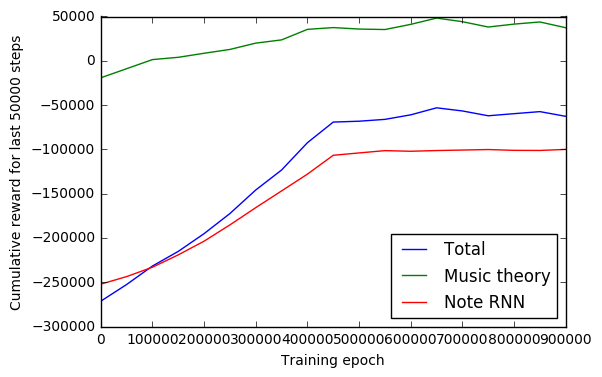

In [13]:
# Plot the rewards received during training. Improves as chance of random exploration action decreases.
rl_net.plot_rewards()

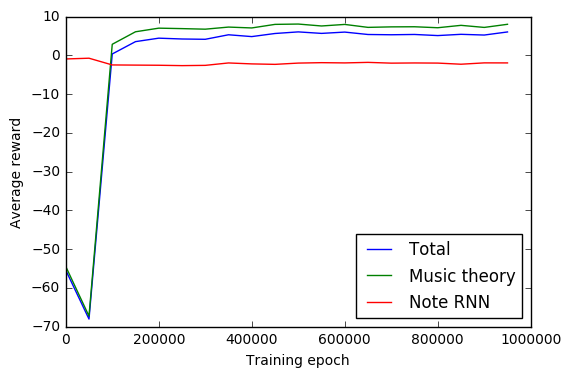

In [14]:
# Plot rewards received during calls to evaluation function throughout training. 
# Does not include exploration or random actions.
rl_net.plot_evaluation()

In [20]:
seq = rl_net.get_music_sequence()
note_seq.play_sequence(seq)

INFO:tensorflow:Priming with note 15
INFO:tensorflow:Generated sequence: [0, 0, 16, 0, 0, 1, 18, 18, 19, 21, 0, 26, 0, 0, 1, 19, 0, 23, 25, 26, 0, 0, 1, 19, 23, 26, 1, 26, 1, 28, 1, 21]
Generated sequence: [0, 0, 16, 0, 0, 1, 18, 18, 19, 21, 0, 26, 0, 0, 1, 19, 0, 23, 25, 26, 0, 0, 1, 19, 23, 26, 1, 26, 1, 28, 1, 21]


In [16]:
# If you're happy with the model, save a version!
rl_net.save_model(SAVE_PATH, 'my_cool_model')

In [11]:
# Compute statistics about how well the model adheres to the music theory rules.
stat_dict = rl_net.evaluate_music_theory_metrics(num_compositions=100)

100%|██████████| 100000/100000 [1:57:42<00:00, 14.16it/s] 


INFO:tensorflow:Total compositions: 100000.0
Total notes:3200000.0
	Compositions starting with tonic: 22303.0
	Compositions with unique highest note:54646.0
	Compositions with unique lowest note:69052.0
	Number of resolved leaps:81909.0
	Number of double leaps:10645.0
	Notes not in key:38473.0
	Notes in motif:2364131.0
	Notes in repeated motif:382.0
	Notes excessively repeated:662.0

	Percent compositions starting with tonic:0.22303
	Percent compositions with unique highest note:0.54646
	Percent compositions with unique lowest note:0.69052
	Percent of leaps resolved:0.8849860621907211
	Percent notes not in key:0.0120228125
	Percent notes in motif:0.7387909375
	Percent notes in repeated motif:0.000119375
	Percent notes excessively repeated:0.000206875

	Average autocorrelation of lag1:-0.13653081569112718
	Average autocorrelation of lag2:-0.01439011328424797
	Average autocorrelation of lag3:-0.001553487819205981

	Avg. num octave jumps per composition:0.00677
	Avg. num sevenths per comp